In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from dotenv import load_dotenv
import warnings

warnings.filterwarnings("ignore", message="Workbook contains no default style, apply openpyxl's default")

load_dotenv()

# 환경 변수 불러오기
file2023_path = os.getenv('FILE2023_PATH')
file_path22_21 = os.getenv('FILE_PATH22_21')
file_path19_20 = os.getenv('FILE_PATH19_20')
file_path17_18 = os.getenv('FILE_PATH17_18')


# 데이터 불러오기
cctv = pd.read_excel("cctv데이터.xlsx")
crime1 = pd.read_excel(file_path17_18, skiprows=1, header=[0, 1], engine='openpyxl')
crime2 = pd.read_excel(file_path19_20, skiprows=1, header=[0, 1], engine='openpyxl')
crime3 = pd.read_excel(file_path22_21, skiprows=1, header=[0, 1], engine='openpyxl')
crime4 = pd.read_excel(file2023_path, skiprows=1, header=[0, 1], engine='openpyxl')


In [2]:
# 범죄 데이터 통합
crime_all = pd.concat([crime1, crime2, crime3, crime4])

df_filtered = crime1[crime1[('범죄별(1)', '범죄별(1)')] == '형법범']

seoul = [i for i in df_filtered if "서울" in i[0]]


# # 범죄 데이터 통합
# crime_all = pd.concat([crime1, crime2, crime3, crime4])

# df_filtered = crime1[crime1[('범죄별(1)', '범죄별(1)')] == '형법범']
# creime_Df = crime_all [crime_all [('범죄별(1)', '범죄별(1)')] == '형법범']
# seoul = [i for i in creime_Df if "서울" in i[0]]

# creime_Df



In [3]:
# 열들 추출
crime_data = df_filtered[seoul].copy() # 범죄_서울 구 추출
gu_list=  [i[1]+ "구" for i in df_filtered if "서울" in i[0]] # 서울 구만 추출
monthly_crime_totals = crime_data.values.flatten().tolist() # 범죄 구 별 범죄 합

crime_summary_df = pd.DataFrame({
    '자치구': gu_list,
    '범죄발생합계': monthly_crime_totals
})
print(crime_summary_df )

       자치구  범죄발생합계
0      종로구    1648
1      중구구    1839
2      용산구    1385
3      성동구    1074
4      광진구    2178
5     동대문구    1554
6      중랑구    1536
7      성북구    1347
8      강북구    1014
9      도봉구     634
10     노원구    1540
11     은평구    1388
12    서대문구    1229
13     마포구    2097
14     양천구    1591
15     강서구    1887
16     구로구    1732
17     금천구     988
18    영등포구    2311
19     동작구    1230
20     관악구    2134
21     서초구    1821
22     강남구    3144
23     송파구    2279
24     강동구    1648
25   종로.1구    1488
26   중구.1구    1858
27   용산.1구    1133
28   성동.1구     998
29   광진.1구    1767
30  동대문.1구    1453
31   중랑.1구    1527
32   성북.1구    1162
33   강북.1구    1116
34   도봉.1구     785
35   노원.1구    1414
36   은평.1구    1275
37  서대문.1구    1061
38   마포.1구    2023
39   양천.1구    1384
40   강서.1구    1729
41   구로.1구    1724
42   금천.1구    1020
43  영등포.1구    2287
44   동작.1구    1153
45   관악.1구    2171
46   서초.1구    1866
47   강남.1구    3022
48   송파.1구    2356
49   강동.1구    1516


In [4]:
# CCTV 데이터에서 자치구 추출
cctv['자치구'] = cctv['소재지도로명주소'].str.extract(r'(\S+구)')

cctv_by_gu = cctv['자치구'].value_counts().reset_index()
cctv_by_gu.columns = ['자치구', 'CCTV_수']
cctv_by_gu

# 예시: gu_counts라는 DataFrame에 '자치구'와 'CCTV_수'가 있을 경우
cctv_by_gu.loc[cctv_by_gu['자치구'] == '입구', '자치구'] = '도봉구'

서울_25개_자치구 = [
    '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구',
    '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', '영등포구',
    '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'
]

cctv_by_gu = cctv_by_gu[cctv_by_gu['자치구'].isin(서울_25개_자치구)]

cctv_by_gu


,자치구,CCTV_수
0,양천구,4795
1,영등포구,4697
2,송파구,4669
3,강북구,3584
4,서초구,3232
5,노원구,3111
6,용산구,1931
7,성북구,1822
8,강남구,1793
9,은평구,1789


In [5]:
import json
import folium
import pandas as pd
from branca.colormap import LinearColormap

# 색상 단계 정의
colors = ['red', 'lightcoral', 'orange', 'blue', 'lightblue']
color_scale = LinearColormap(colors=colors,
                             vmin=cctv_by_gu['CCTV_수'].min(),
                             vmax=cctv_by_gu['CCTV_수'].max())

# GeoJSON 파일 로드
geojson_path = r'E:\Traffic-Safety\위치 데이터\서울특별시.json'
with open(geojson_path, encoding='utf-8') as f:
    seoul_geo = json.load(f)

# GeoJSON에 'gu' 필드 추가
for feature in seoul_geo['features']:
    adm_nm = feature['properties']['adm_nm']  # 예: '서울특별시 성동구 행당동'
    gu_name = adm_nm.split()[1]  # '성동구'
    feature['properties']['gu'] = gu_name

# CCTV 데이터에서 자치구 필터링
geo_gu_list = {f['properties']['gu'] for f in seoul_geo['features']}
gu_counts_filtered = cctv_by_gu[cctv_by_gu['자치구'].isin(geo_gu_list)]

# folium 지도 생성
m = folium.Map(location=[37.5665, 126.9780], zoom_start=11)

# 스타일 함수 정의 (색상 적용)
def style_function(feature):
    gu_name = feature['properties']['gu']
    value = gu_counts_filtered.loc[gu_counts_filtered['자치구'] == gu_name, 'CCTV_수']
    if not value.empty:
        fill_color = color_scale(value.values[0])
    else:
        fill_color = 'gray'  # 데이터 없을 때
    return {
        'fillColor': fill_color,
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.7
    }

# GeoJson으로 색상 직접 입히기
folium.GeoJson(
    seoul_geo,
    style_function=style_function,
    tooltip=folium.GeoJsonTooltip(fields=['gu'], aliases=['자치구:'])
).add_to(m)

# 색상 범례 추가
color_scale.caption = '서울시 구별 CCTV 설치 수'
color_scale.add_to(m)

# 지도 저장
m.save("seoul_cctv_by_gu_custom_colors.html")


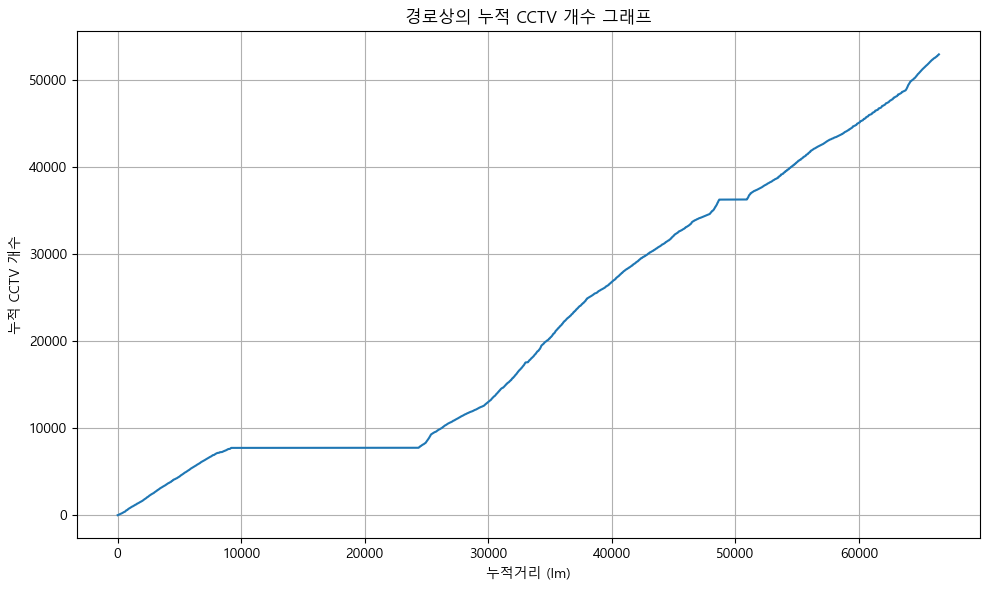

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings("ignore")


# 두 지점의 위도, 경도 값으로 거리(km)를 계산하는 haversine 함수
def haversine(lat1, lon1, lat2, lon2):
    # 위도/경도를 라디안 단위로 변환
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a))
    r = 6371  # 지구 반지름 (km)
    return c * r

# 엑셀 파일 읽어오기 (파일 경로가 맞는지 확인)

# 위도와 경도 컬럼이 있는지 확인 (여기서는 '위도'와 '경도'가 컬럼명이라고 가정)
if 'WGS84위도' not in cctv.columns or 'WGS84경도' not in cctv.columns:
    raise ValueError("엑셀 파일에 '위도'와 '경도' 컬럼이 존재하지 않습니다.")

# 누적거리(lm) 컬럼이 없으면, 계산하여 생성
if '누적거리(lm)' not in cctv.columns:
    cumulative_distance = [0]  # 시작점은 0 lm
    for i in range(1, len(cctv)):
        lat1 = cctv.loc[i - 1, 'WGS84위도']
        lon1 = cctv.loc[i - 1, 'WGS84경도']
        lat2 = cctv.loc[i, 'WGS84위도']
        lon2 = cctv.loc[i, 'WGS84경도']
        distance = haversine(lat1, lon1, lat2, lon2)
        cumulative_distance.append(distance)
    # 각 지점 간 거리의 누적합을 구함 (단위: km)
    cctv['누적거리(lm)'] = np.cumsum(cumulative_distance)

# 각 행을 1개 CCTV로 보고 누적 개수를 계산
cctv['누적CCTV개수'] = np.arange(1, len(cctv) + 1)

# 누적 거리에 따른 누적 CCTV 개수 선 그래프 출력
plt.figure(figsize=(10, 6))
plt.plot(cctv['누적거리(lm)'], cctv['누적CCTV개수'], linestyle='-')
plt.xlabel('누적거리 (lm)')
plt.ylabel('누적 CCTV 개수')
plt.title('경로상의 누적 CCTV 개수 그래프')
plt.grid(True)
plt.tight_layout()
plt.show()


In [34]:
import matplotlib.pyplot as plt
from adjustText import adjust_text
import warnings


# 그림 크기 설정
plt.figure(figsize=(12, 6))



import json
import os

adjust_file = r'E:\Traffic-Safety\위치 데이터\adjust_cctv.json'

if not os.path.exists(adjust_file):
    print(f"[경고] 조정값 파일 '{adjust_file}' 이 존재하지 않습니다.")
    adjust_data = {}
else:
    with open(adjust_file, 'r', encoding='utf-8') as f:
        try:
            adjust_data = json.load(f)
        except json.JSONDecodeError:
            print("[오류] JSON 형식이 잘못되었습니다.")
            adjust_data = {}

# 조정값 적용
cctv_by_gu['조정값'] = cctv_by_gu['자치구'].map(adjust_data).fillna(0).astype(int)
cctv_by_gu['조정후_CCTV'] = cctv_by_gu['CCTV_수'] + cctv_by_gu['조정값']

cctv_by_gu


,자치구,CCTV_수,조정값,조정후_CCTV
0,양천구,4795,0,4795
1,영등포구,4697,0,4697
2,송파구,4669,0,4669
3,강북구,3584,0,3584
4,서초구,3232,0,3232
5,노원구,3111,0,3111
6,용산구,1931,0,1931
7,성북구,1822,0,1822
8,강남구,1793,0,1793
9,은평구,1789,0,1789


<Figure size 1200x600 with 0 Axes>

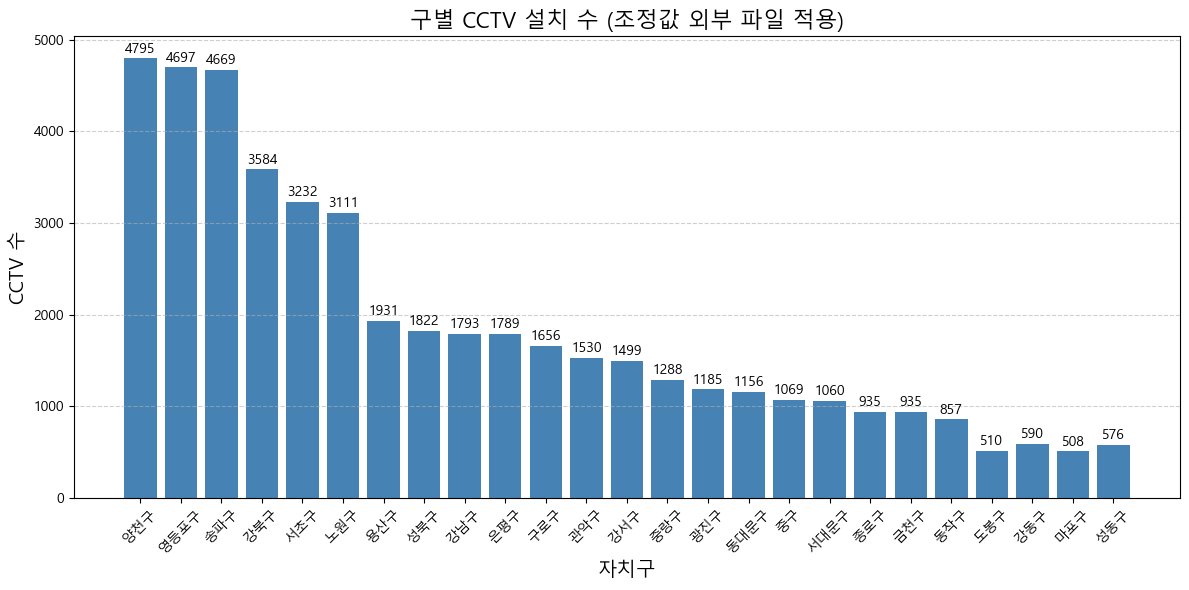

In [35]:

# ✅ 시각화 (표시는 원래 값만 보여주되, 그래프는 조정값 반영)
plt.figure(figsize=(12, 6))
bars = plt.bar(cctv_by_gu['자치구'], cctv_by_gu['조정후_CCTV'], color='steelblue')

plt.title('구별 CCTV 설치 수 (조정값 외부 파일 적용)', fontsize=16)
plt.xlabel('자치구', fontsize=14)
plt.ylabel('CCTV 수', fontsize=14)
plt.xticks(rotation=45)

for idx, bar in enumerate(bars):
    true_val = cctv_by_gu.iloc[idx]['조정후_CCTV']
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 30, f'{int(true_val)}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [36]:
import json
import folium
import pandas as pd
from branca.colormap import LinearColormap

# 색상 단계 정의
colors = ['red', 'lightcoral', 'orange', 'blue', 'lightblue']
color_scale = LinearColormap(colors=colors,
                             vmin=cctv_by_gu['CCTV_수'].min(),
                             vmax=cctv_by_gu['CCTV_수'].max())

# GeoJSON 파일 로드
geojson_path = r'E:\Traffic-Safety\위치 데이터\서울특별시.json'
with open(geojson_path, encoding='utf-8') as f:
    seoul_geo = json.load(f)

# GeoJSON에 'gu' 필드 추가
for feature in seoul_geo['features']:
    adm_nm = feature['properties']['adm_nm']  # 예: '서울특별시 성동구 행당동'
    gu_name = adm_nm.split()[1]  # '성동구'
    feature['properties']['gu'] = gu_name

# CCTV 데이터에서 자치구 필터링
geo_gu_list = {f['properties']['gu'] for f in seoul_geo['features']}
gu_counts_filtered = cctv_by_gu[cctv_by_gu['자치구'].isin(geo_gu_list)]

# folium 지도 생성
m = folium.Map(location=[37.5665, 126.9780], zoom_start=11)

# 스타일 함수 정의 (색상 적용)
def style_function(feature):
    gu_name = feature['properties']['gu']
    value = gu_counts_filtered.loc[gu_counts_filtered['자치구'] == gu_name, 'CCTV_수']
    if not value.empty:
        fill_color = color_scale(value.values[0])
    else:
        fill_color = 'gray'  # 데이터 없을 때
    return {
        'fillColor': fill_color,
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.7
    }

# GeoJson으로 색상 직접 입히기
folium.GeoJson(
    seoul_geo,
    style_function=style_function,
    tooltip=folium.GeoJsonTooltip(fields=['gu'], aliases=['자치구:'])
).add_to(m)

# 색상 범례 추가
color_scale.caption = '서울시 구별 CCTV 설치 수'
color_scale.add_to(m)

# 지도 저장
m.save("seoul_cctv_by_gu_custom_colors.html")


In [37]:
fiie_path_gu_people = r'E:\Traffic-Safety\위치 데이터\등록인구_20250412000902.xlsx'
df_gu_people3 = pd.read_excel(fiie_path_gu_people, engine='openpyxl')
df_gu_people3.head(5)

,동별(1),동별(2),2024 4/4,2024 4/4.1,2024 4/4.2,2024 4/4.3,2024 4/4.4,2024 4/4.5,2024 4/4.6,2024 4/4.7,2024 4/4.8,2024 4/4.9,2024 4/4.10,2024 4/4.11
0,동별(1),동별(2),세대 (세대),계 (명),계 (명),계 (명),한국인 (명),한국인 (명),한국인 (명),등록외국인 (명),등록외국인 (명),등록외국인 (명),세대당인구 (명),65세이상고령자 (명)
1,동별(1),동별(2),소계,소계,남자,여자,소계,남자,여자,소계,남자,여자,소계,소계
2,합계,소계,4482063,9597372,4619963,4977409,9331828,4505355,4826473,265544,114608,150936,2.08,1824895
3,NaN,종로구,72166,149608,71365,78243,138336,66570,71766,11272,4795,6477,1.92,29840
4,NaN,중구,64995,131214,62924,68290,120544,58015,62529,10670,4909,5761,1.85,26853


In [38]:
result_grouped = df_gu_people3.groupby('동별(2)')['2024 4/4'].sum().reset_index()
result_grouped
# 방법 2: drop() 메서드를 이용해 조건에 맞는 행을 각각 제거하기

# 조건 1: '동별(2)' 제거
result_grouped = result_grouped[~result_grouped['동별(2)'].str.contains('동별\\(2\\)', na=False)]

# 조건 2: '소계' 제거
df_filtered = result_grouped[~result_grouped['동별(2)'].str.contains('소계', na=False)]

df_filtered.columns = ['자치구', '인구합계']

# 결과 출력
df_filtered  ## 



,자치구,인구합계
0,강남구,245094
1,강동구,212585
2,강북구,143063
3,강서구,273911
4,관악구,285963
5,광진구,169931
6,구로구,183891
7,금천구,121075
8,노원구,217743
9,도봉구,138759


In [39]:

# 3. 두 DataFrame 병합 (공통된 '자치구'만 남김)
df_merged = pd.merge(df_filtered, cctv_by_gu, on='자치구', how='inner')

df_merged

# 4. 인구 대비 가로등 수 비율 계산: (인구합계 / 총합)
#    예를 들어, 비율이 100이면, 한 가로등당 100명의 인구가 존재하는 것
df_merged['인구대_cctv 비율'] = df_merged['인구합계'] / df_merged['CCTV_수']

# 5. 결과 출력
df_merged

,자치구,인구합계,CCTV_수,조정값,조정후_CCTV,인구대_cctv 비율
0,강남구,245094,1793,0,1793,136.694925
1,강동구,212585,2,588,590,106292.5
2,강북구,143063,3584,0,3584,39.917132
3,강서구,273911,1499,0,1499,182.729153
4,관악구,285963,1530,0,1530,186.903922
5,광진구,169931,1185,0,1185,143.401688
6,구로구,183891,1656,0,1656,111.04529
7,금천구,121075,935,0,935,129.491979
8,노원구,217743,3111,0,3111,69.991321
9,도봉구,138759,5,505,510,27751.8


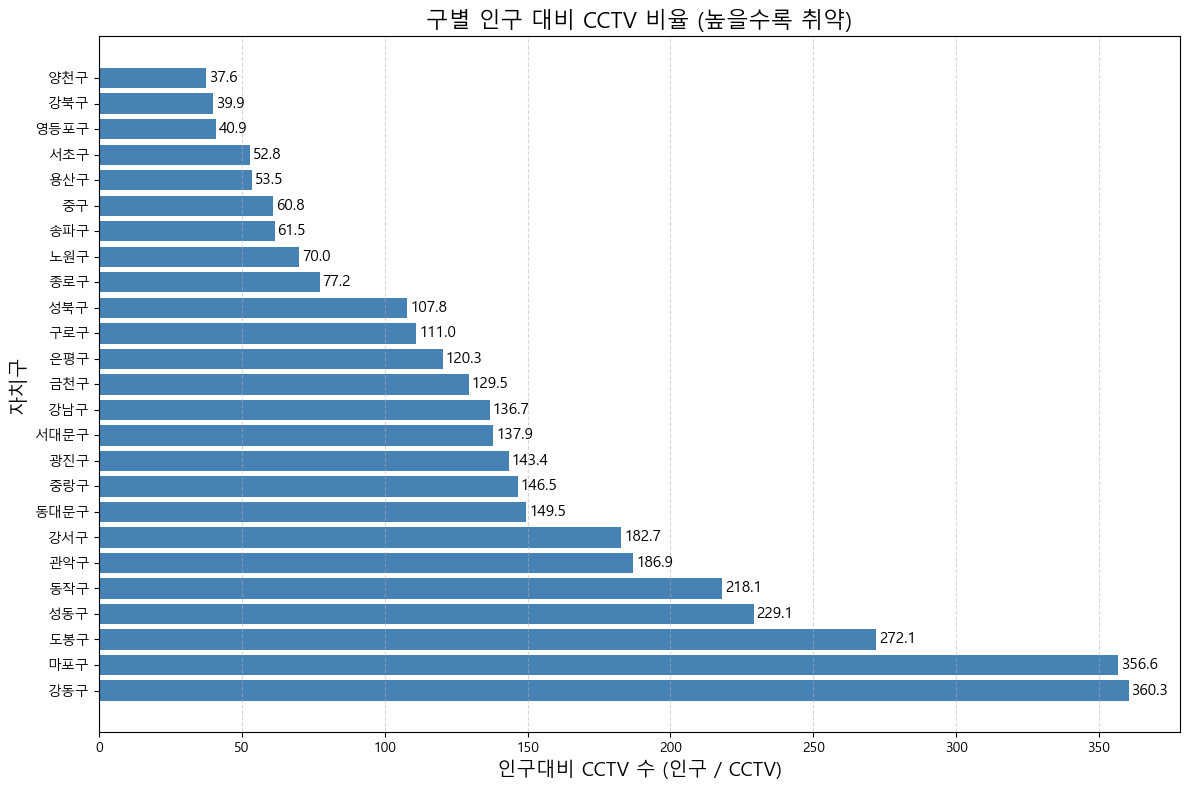

In [ ]:

# ✅ 인구 대비 CCTV 비율 계산
df_merged['인구대_cctv 비율'] = df_merged['인구합계'] / df_merged['조정후_CCTV']

# ✅ 비율 높은 순으로 정렬 (많은 인구당 CCTV 하나 → 감시 취약)
df_sorted = df_merged.sort_values(by='인구대_cctv 비율', ascending=False)

# ✅ 가로 막대그래프
plt.figure(figsize=(12, 8))
bars = plt.barh(df_sorted['자치구'], df_sorted['인구대_cctv 비율'], color='steelblue')

plt.xlabel("인구대비 CCTV 수 (인구 / CCTV)", fontsize=14)
plt.ylabel("자치구", fontsize=14)
plt.title("구별 인구 대비 CCTV 비율 (높을수록 취약)", fontsize=16)

# ✅ 막대 옆에 값 표시
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2,
             f"{width:.1f}", va='center', ha='left', fontsize=11)

plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()


In [42]:
import matplotlib.pyplot as plt
from adjustText import adjust_text
import warnings

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings("ignore")

# 자치구 정제
crime_summary_df['자치구'] = crime_summary_df['자치구'].str.replace(r'\.1구$', '구', regex=True)
crime_summary_df['자치구'] = crime_summary_df['자치구'].str.replace(r'구구$', '구', regex=True)

# 병합 (보안등+스마트등, CCTV, 범죄, 가로수)
crime_summary_df

df_grouped = crime_summary_df.groupby('자치구', as_index=False)['범죄발생합계'].mean()

df_grouped

,자치구,범죄발생합계
0,강남구,3083.0
1,강동구,1582.0
2,강북구,1065.0
3,강서구,1808.0
4,관악구,2152.5
5,광진구,1972.5
6,구로구,1728.0
7,금천구,1004.0
8,노원구,1477.0
9,도봉구,709.5


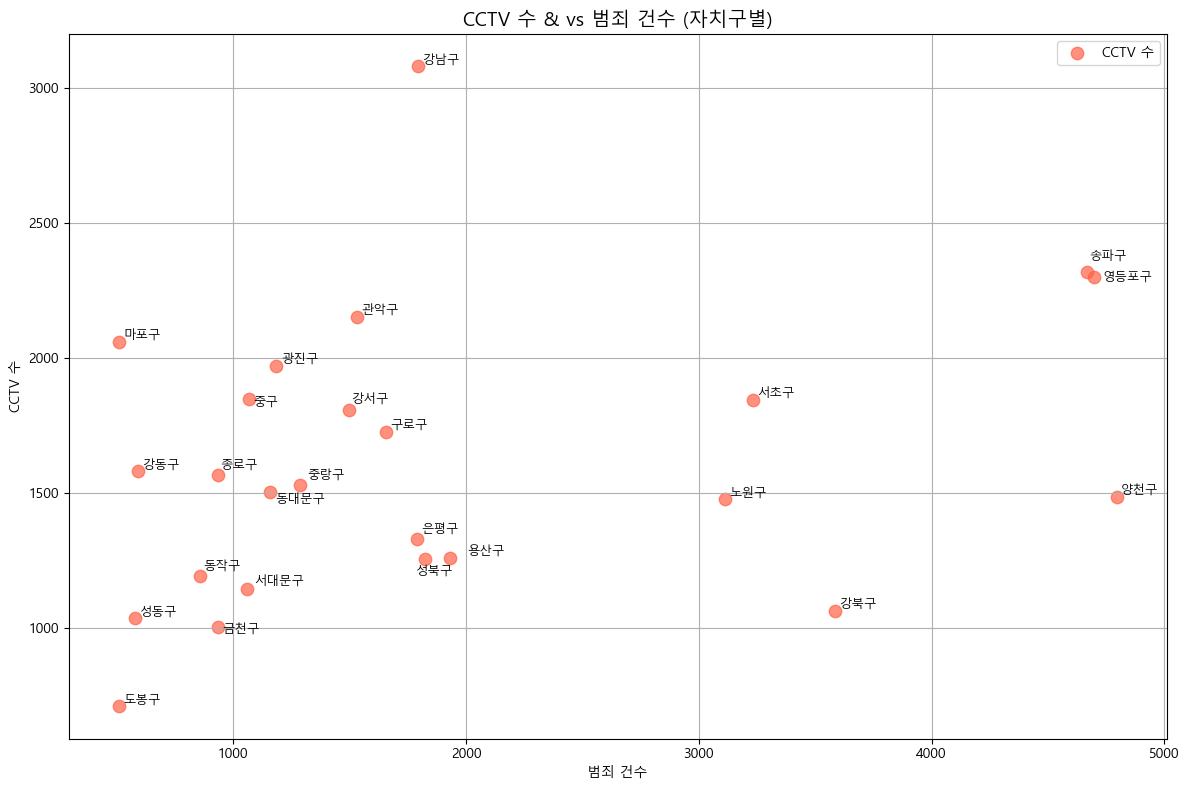

In [43]:

df = pd.merge( df_grouped,cctv_by_gu, on='자치구')


# 시각화
plt.figure(figsize=(12, 8))

# 1. CCTV 수 vs 범죄 건수
plt.scatter(df['조정후_CCTV'], df['범죄발생합계'], color='tomato', label='CCTV 수', s=80, alpha=0.7)


# 라벨은 CCTV 쪽 기준으로만 붙임 (원하면 둘 다 가능)
texts = []
for i in range(len(df)):
    texts.append(plt.text(df['조정후_CCTV'][i], df['범죄발생합계'][i], df['자치구'][i], fontsize=9))

adjust_text(texts)
plt.title('CCTV 수 & vs 범죄 건수 (자치구별)', fontsize=14)
plt.xlabel('범죄 건수')
plt.ylabel('CCTV 수')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
